In [91]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [92]:
dataset_path='insurance.csv'
df=pd.read_csv(dataset_path)
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [93]:
df.shape

(1338, 7)

In [94]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [95]:
y=df['charges']

In [96]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [97]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Text(0, 0.5, 'Frequency')

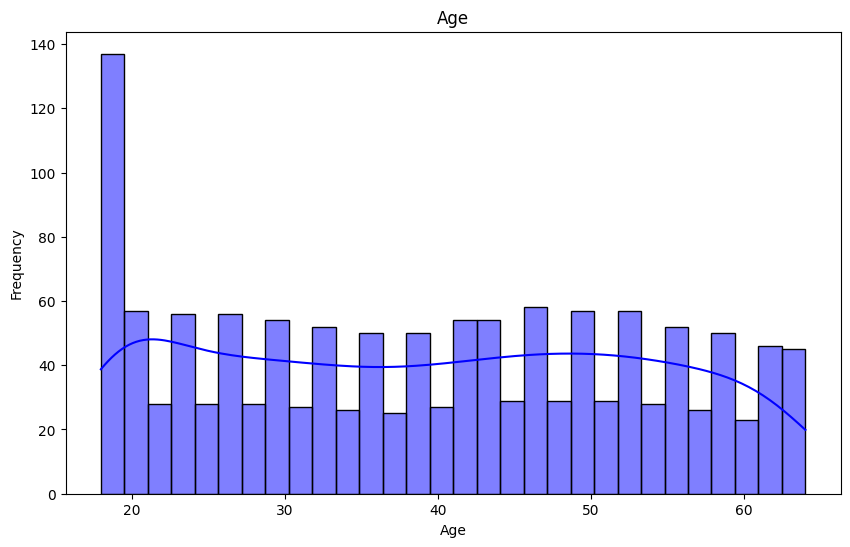

In [98]:

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

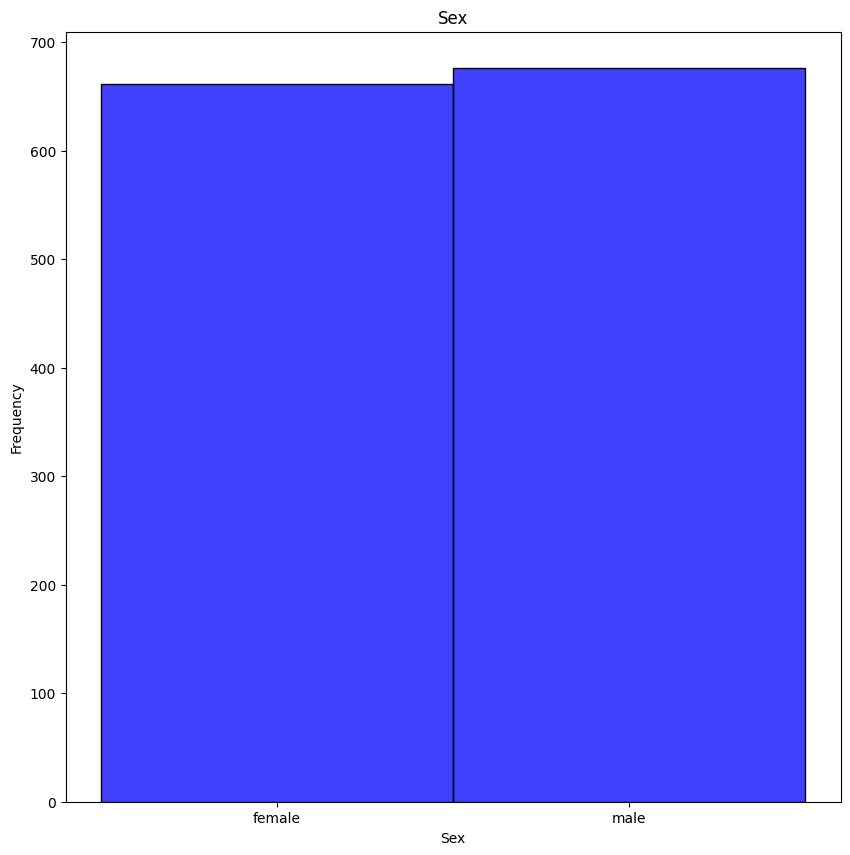

In [99]:

plt.figure(figsize=(10, 10))
sns.histplot(df['sex'], bins=30, color='blue')
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

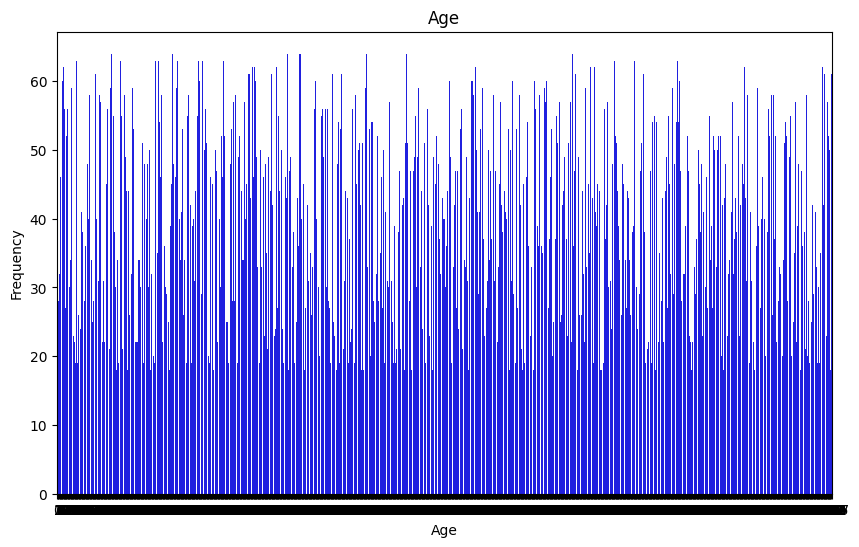

In [100]:

plt.figure(figsize=(10, 6))
sns.barplot(df['age'], color='blue')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

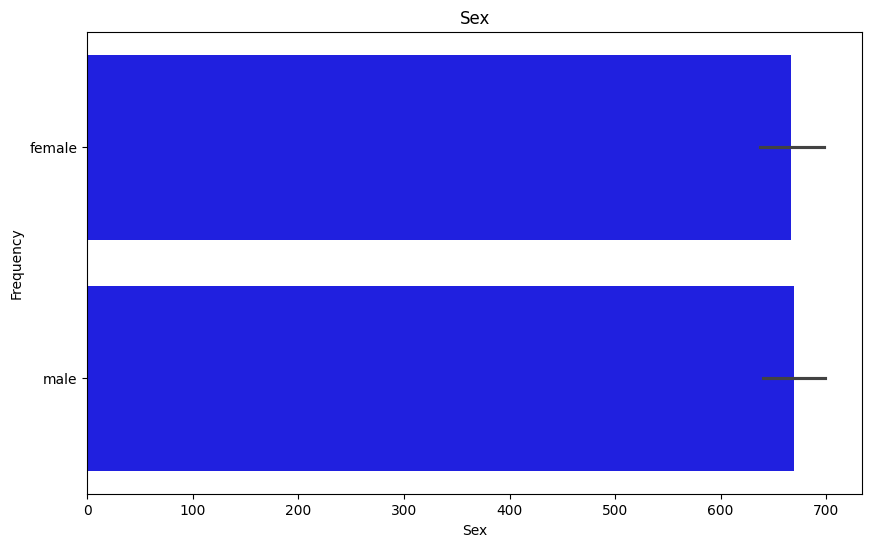

In [101]:

plt.figure(figsize=(10, 6))
sns.barplot(df['sex'], color='blue')
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

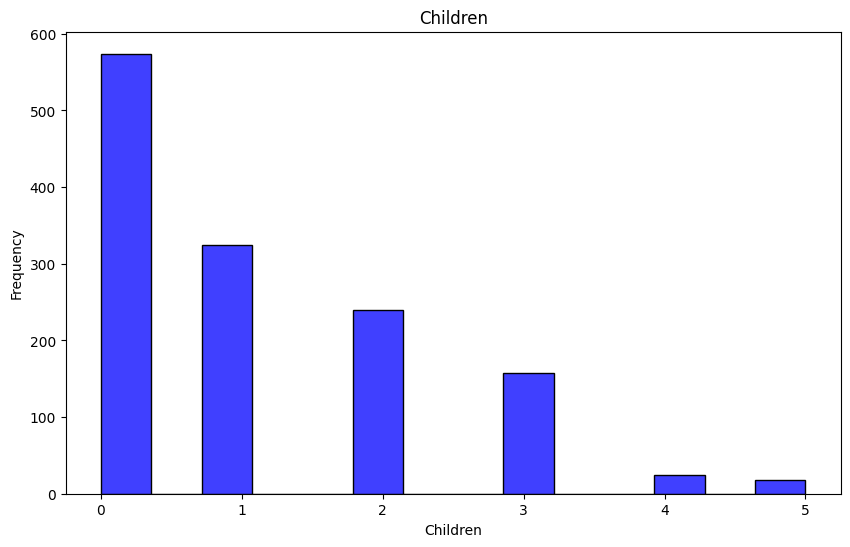

In [102]:

plt.figure(figsize=(10, 6))
sns.histplot(df['children'], color='blue')
plt.title('Children')
plt.xlabel('Children')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

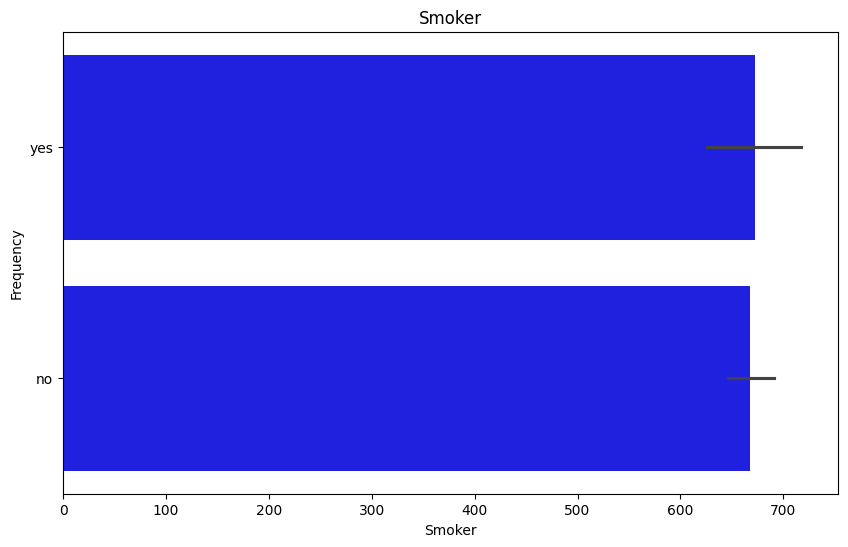

In [103]:

plt.figure(figsize=(10, 6))
sns.barplot(df['smoker'], color='blue')
plt.title('Smoker')
plt.xlabel('Smoker')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

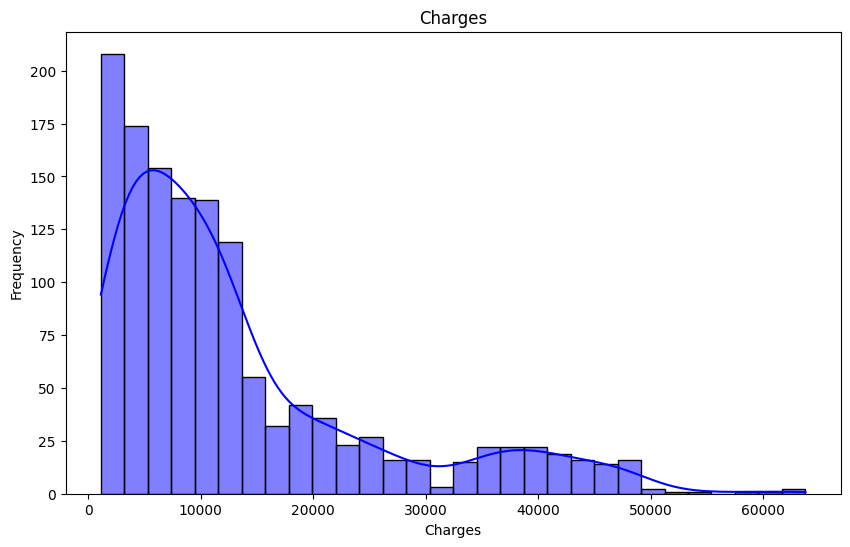

In [104]:

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'],kde=True, color='blue')
plt.title('Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')


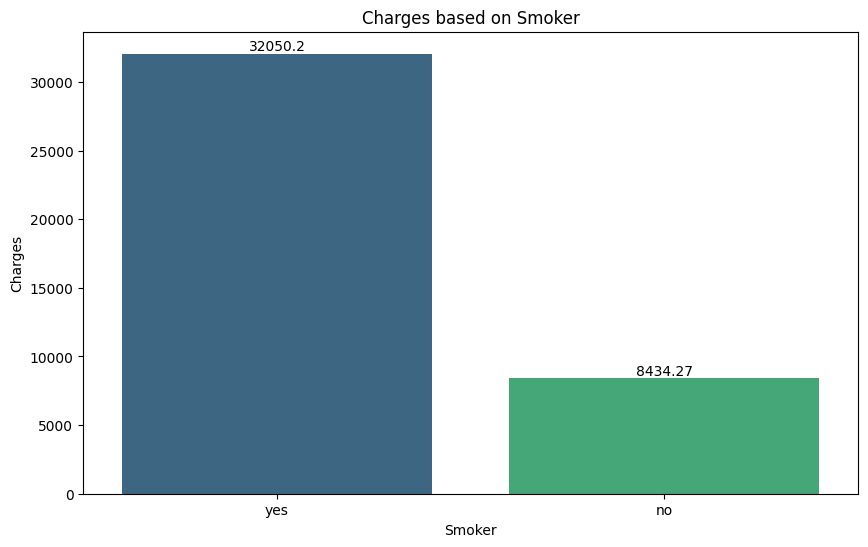

In [105]:

plt.figure(figsize=(10, 6))
graph=sns.barplot(y='charges',x='smoker',hue='smoker',data=df,palette='viridis',errorbar=None)
plt.title('Charges based on Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')


for container in graph.containers:
    graph.bar_label(container)

plt.show()


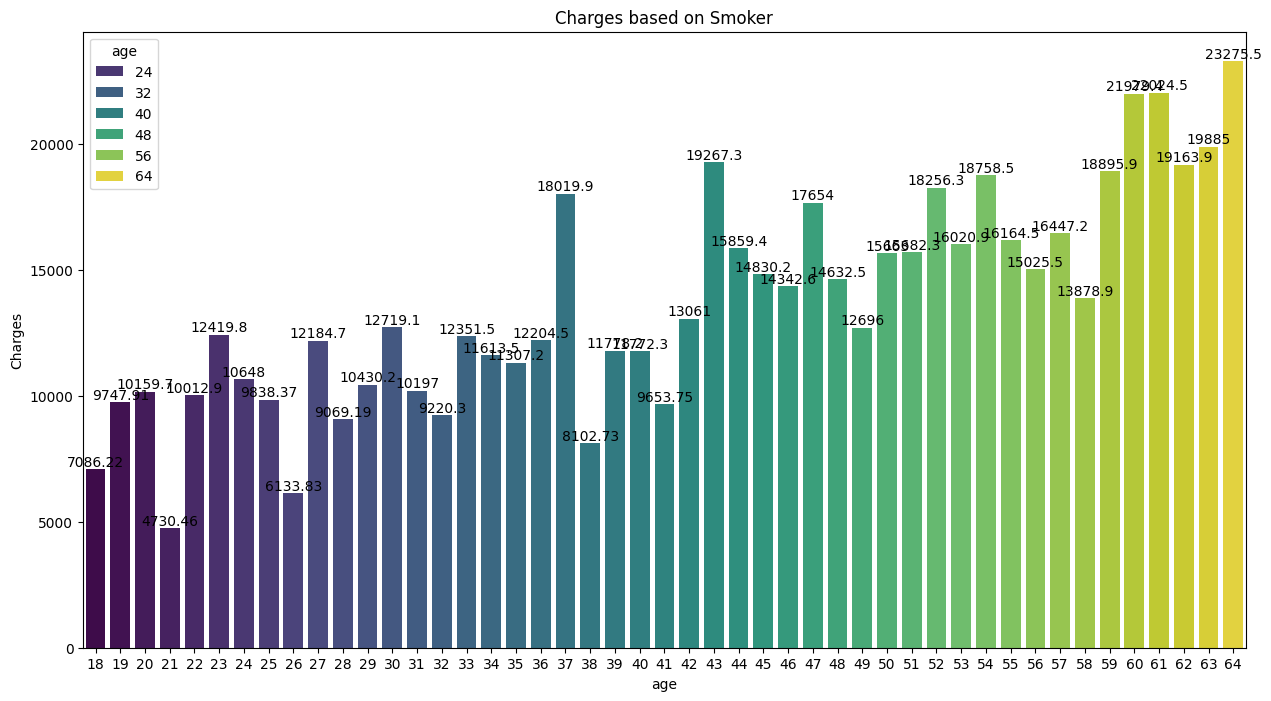

In [106]:

plt.figure(figsize=(15, 8))
graph=sns.barplot(y='charges',x='age',hue='age',data=df,palette='viridis',errorbar=None)
plt.title('Charges based on Smoker')
plt.xlabel('age')
plt.ylabel('Charges')


for container in graph.containers:
    graph.bar_label(container)

plt.show()


In [107]:
df['age'].max()

np.int64(64)

In [108]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


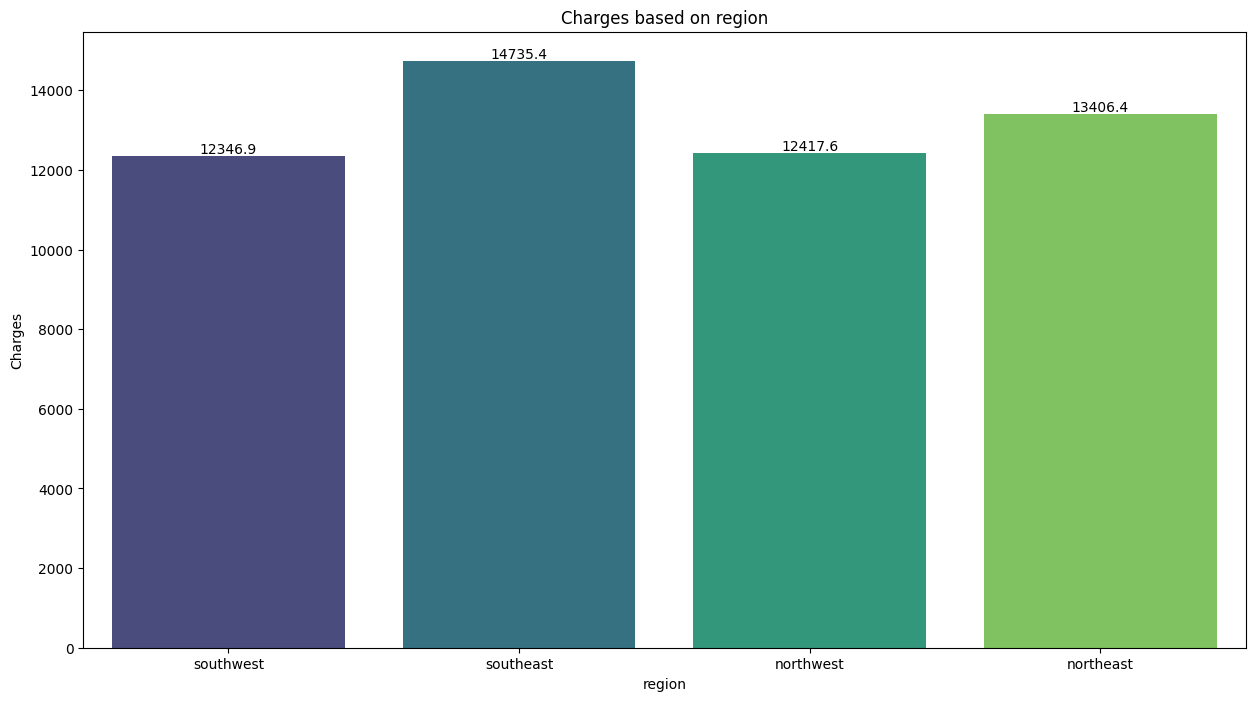

In [109]:

plt.figure(figsize=(15, 8))
graph=sns.barplot(y='charges',x='region',hue='region',data=df,palette='viridis',errorbar=None)
plt.title('Charges based on region')
plt.xlabel('region')
plt.ylabel('Charges')


for container in graph.containers:
    graph.bar_label(container)

plt.show()


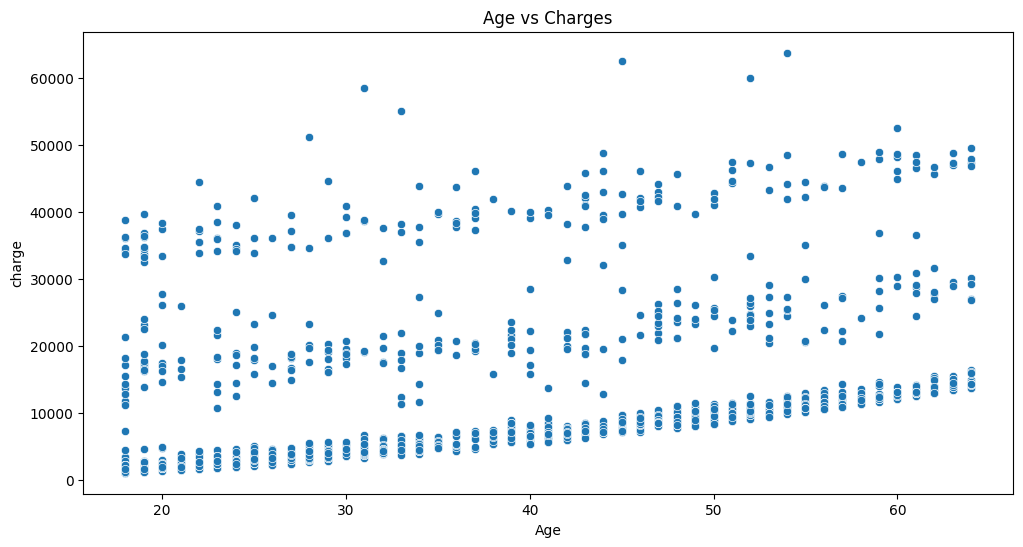

In [110]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age',y='charges',data=df)
plt.title('Age vs Charges')
plt.xlabel("Age")
plt.ylabel('charge')
plt.show()

In [111]:
southeast_df = df[df['region'].str.contains('southeast', case=False, na=False)]

In [112]:
southeast_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
11,62,female,26.29,0,yes,southeast,27808.7251


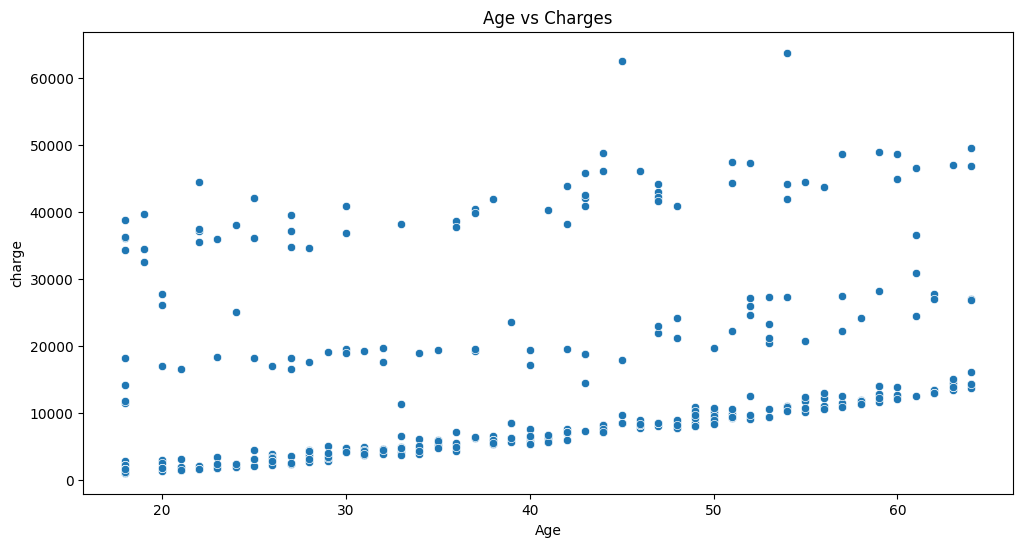

In [113]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age',y='charges',data=southeast_df)
plt.title('Age vs Charges')
plt.xlabel("Age")
plt.ylabel('charge')
plt.show()

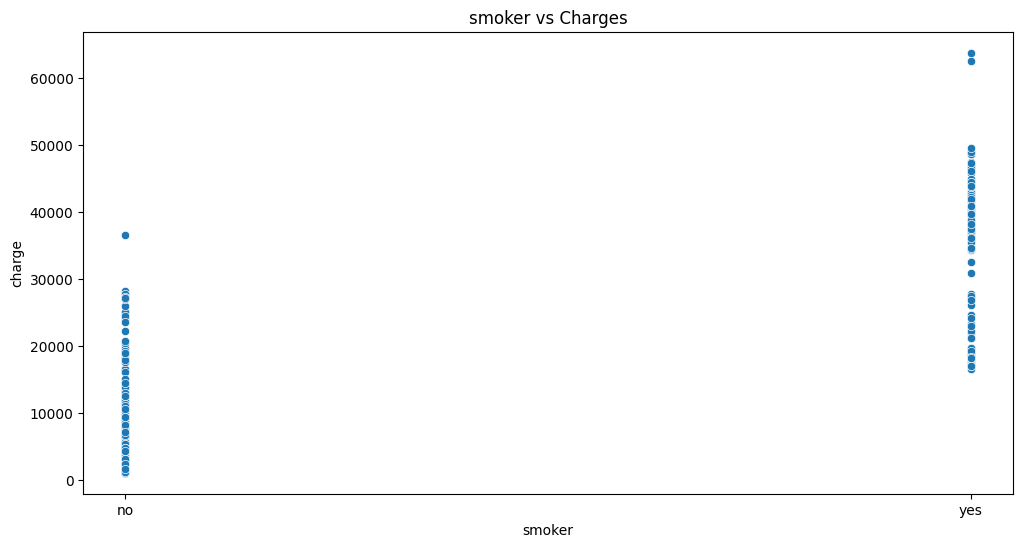

In [114]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='smoker',y='charges',data=southeast_df)
plt.title('smoker vs Charges')
plt.xlabel("smoker")
plt.ylabel('charge')
plt.show()

<Axes: >

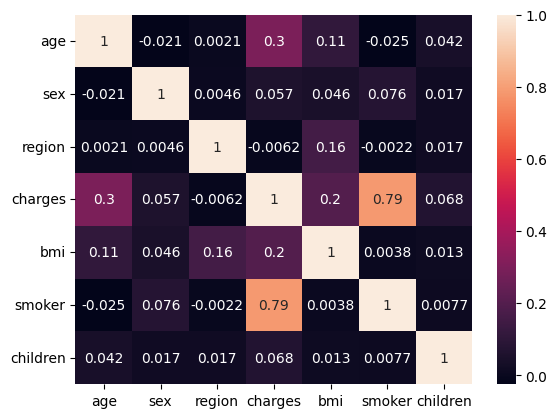

In [129]:
df=df[["age","sex","region","charges","bmi",'smoker','children']]

corr=df.corr()
sns.heatmap(corr,annot=True)

In [119]:
from sklearn.preprocessing import LabelEncoder

Label_encoder=LabelEncoder()

df['smoker']=Label_encoder.fit_transform(df['smoker'])
print(Label_encoder.classes_)

df['region']=Label_encoder.fit_transform(df['region'])
print(Label_encoder.classes_)

df['sex']=Label_encoder.fit_transform(df['sex'])
print(Label_encoder.classes_)


[0 1]
[0 1 2 3]
[0 1]


In [130]:
X=df[['smoker']]
print(X.shape)
y=df['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"\nTesting set shape: {X_test.shape}")

(1338, 1)

Training set shape: (1070, 1)

Testing set shape: (268, 1)


In [131]:
model=LinearRegression()
model.fit(X_train,y_train)
print("\nModel training complete: ")

print(f"Coefficient (w1): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")


Model training complete: 
Coefficient (w1): 23188.685870681868
Intercept (b): 8578.32254799999


In [154]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

y_pred=model.predict(X_test)

#Calculate metrics
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Absolute error: ",metrics.mean_absolute_error(y_test,model.predict(X_test)))
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}") 

Mean Absolute error:  5625.810656140092
Mean Squared Error (MSE): 52745964.73
R-squared (R2): 0.66


In [148]:
x=int(input("Enter 1 for smoker and 0 for non smoker: "))
smoker = np.array([[x]])
if x==1:
    predicted_smoker = model.predict(smoker)
    print(f"\nPredicted charges for smoker: ${predicted_smoker[0]:.2f}")
elif x==0:
    predicted_smoker = model.predict(smoker)
    print(f"\nPredicted charges for non smoker: ${predicted_smoker[0]:.2f}")
else:
    print("Enter 1 or 0!!!")


Predicted charges for smoker: $31767.01


d:\TechAxis\week56\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
